# Análisis en  relación con el punto de Serie de Tiempo

In [2]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing

# Cargar los datos
df = pd.read_csv('matriculaciones_2021_2023.txt', sep='\t', parse_dates=['Registration_Date'])


In [3]:
# Utilizamos la función p.to_datatime para manejar correctamente las fechas permite convertir la columna registration_date a un tio de datos de fecha
df['Registration_Date'] = pd.to_datetime(df['Registration_Date'])

In [4]:
# Agrupamos el DataFrame por mes y cuenta el número de registros por cada mes
monthly_data = df.resample('M', on='Registration_Date').size()

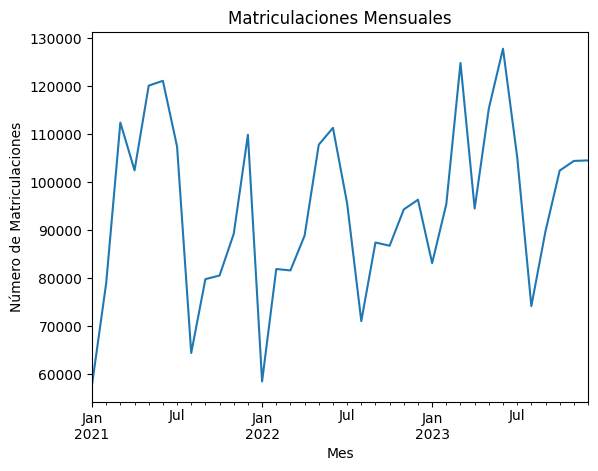

In [5]:
# Realizamos la graficación de las matriculaciones
monthly_data.plot(title='Matriculaciones Mensuales')
plt.ylabel('Número de Matriculaciones')
plt.xlabel('Mes')
plt.show()


In [6]:
# Ajustar el modelo. Usamos una tendencia aditiva y estacionalidad multiplicativa, suponiendo que los patrones se repiten anualmente.
model = ExponentialSmoothing(monthly_data, seasonal='mul', trend='add', seasonal_periods=12).fit()


c:\Users\paulq\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Predicción

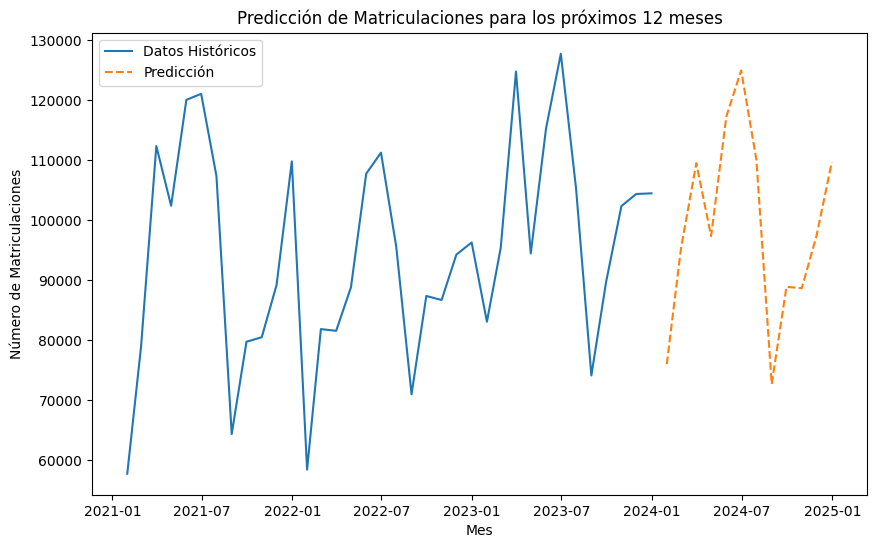

In [7]:
forecast = model.forecast(12)

# Visualizar la serie temporal y las predicciones
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Datos Históricos')
plt.plot(forecast, label='Predicción', linestyle='--')
plt.title('Predicción de Matriculaciones para los próximos 12 meses')
plt.ylabel('Número de Matriculaciones')
plt.xlabel('Mes')
plt.legend()
plt.show()